In [1]:
from datasets import load_dataset

In [2]:
my_dataset = load_dataset('csv', data_files='/home/ubuntu/Documentos/GitHub/MUCSI_Modal/data/captions/raw/gettyimages_bilbao.csv')

Found cached dataset csv (/home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
my_dataset["train"][0]


{'img_url': 'https://media.gettyimages.com/id/1301815245/es/foto/jokin-ezkieta-of-athletic-club-warms-up-during-the-copa-del-ray-semi-final-match-between.jpg?s=612x612&w=0&k=20&c=Gl-59oMjabq44Vdhkg0w0Yh95G8m2iaAkklq8skVIkY=',
 'local_path': 'data/imgs/1682604798.468204-26804.jpg',
 'title': 'Jokin Ezkieta of Athletic Club warms up during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on...',
 'caption': "['BILBAO, SPAIN - FEBRUARY 11: Jokin Ezkieta of Athletic Club warms up during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain. (Photo by Juan Manuel Serrano Arce/Getty Images)']"}

In [4]:
import os
from PIL import Image

def load_image(data):
    
    with open("/home/ubuntu/Documentos/GitHub/MUCSI_Modal/"+data["local_path"], 'rb') as f:
        img = Image.open(f)

        data["image"]=img.convert('RGB')
        return data


In [5]:
my_train = my_dataset["train"]

In [6]:
my_train=my_train.map(load_image)

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-f5a96376772579ef.arrow


In [7]:
my_train

Dataset({
    features: ['img_url', 'local_path', 'title', 'caption', 'image'],
    num_rows: 4950
})

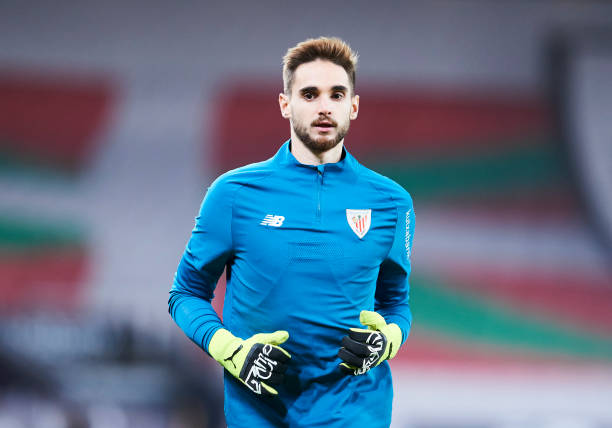

In [8]:
my_train["image"][0]

Una vez cargada las imagenes, se procedera ha realizar la limpieza de los datos. Se ha observado que muchos de los datos empieza con una descripcion que no interesa, pero solo ocurre hasta el primer :. Tambien se ha observado que hay ciertos datos que terminan con una parentesis que seria interesante eliminar. Por ultimo, hay datos que no tienen descripcion,por lo que se utilizara el titulo, cogiendo solo el texto antes del primer -.

In [8]:
my_train["caption"][700]

"['ELCHE, SPAIN - SEPTEMBER 11: Iker Muniain of Athletic Club gestures during the LaLiga Santander match between Elche CF and Athletic Club at Estadio Manuel Martinez Valero on September 11, 2022 in Elche, Spain. (Photo by Aitor Alcalde Colomer/Getty Images)']"

In [12]:
import ast
def limpieza_caption(example):
    if not example['caption']:
        example['caption'] = example['title'].split("-",1)[0].strip()
    else:
        
        example['caption'] = example['caption'].strip("['']")
        partes = example['caption'].rsplit("(", 1)
        if len(partes) > 1:
            example['caption'] = partes[0].strip() 
        #print(example['caption'])
        
        partes = example['caption'].split(":",1)
        #print("1")
        if len(partes) > 1:
            example['caption'] = str(partes[1].strip())
        partes = example['caption'].split("AFP PHOTO",1)
        if len(partes) > 1:
            example['caption'] = str(partes[0].strip())
        
        partes = example['caption'].rsplit("DIGITAL IMAGE", 1)
        if len(partes) > 1:
            example['caption'] = partes[0].strip() 
        partes = example['caption'].rsplit("(Photo by", 1)
        if len(partes) > 1:
            example['caption'] = partes[0].strip()
        partes = example['caption'].rsplit("Photo:", 1)
        if len(partes) > 1:
            example['caption'] = partes[0].strip()
        partes = example['caption'].split("(BILD ZEITUNG OUT)", 1)
        if len(partes) > 1:
            example['caption'] = partes[1].strip()
        partes = example['caption'].split("(BILD OUT)", 1)
        if len(partes) > 1:
            example['caption'] = partes[1].strip()
        example['caption'] = example['caption'].replace('"',"")
        partes = example['caption'].rsplit("- RESTRICTED TO EDITORIAL USE", 1)
        if len(partes) > 1:
            example['caption'] = partes[0].strip()
        partes = example['caption'].split("(EDITORIAL USE ONLY)", 1)
        if len(partes) > 1:
            example['caption'] = partes[1].strip()
        partes = example['caption'].split("(L-R)", 1)
        if len(partes) > 1:
            example['caption'] = partes[1].strip()
        example['caption']=example['caption'].replace('\n', '')
        print(example['caption'])
    return example

In [13]:
my_train = my_train.map(limpieza_caption)

Map:   0%|          | 0/4950 [00:00<?, ? examples/s]

Jokin Ezkieta of Athletic Club warms up during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain.
Inigo Martinez of Athletic Club reacts during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain.
Inigo Martinez of Athletic Club reacts during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain.
Oscar De Marcos of Athletic Club reacts during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain.
Iker Muniain of Athletic Club reacts during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain.
Iker Muniain of Athletic Club reacts during the Copa del Ray Semi Final match between Athletic Club and Levante at 

People walking during the day on the narrow streets of the pedestrian zone in Bilbao\'s Casco Viejo
Details of Guggenheim Museum Bilbao made by titanium that is an architectural milestone of the last century.
Iberdrola Tower designed by Cesar Pelli rises in Abandoibarra district at dusk, in Bilbao, Spain.  The skyscraper is the new headquarters of the basque utilities company Iberdrola and it is located next to the Nervion River close to the Guggenheim Museum Bilbao.
The sculpture Tall Tree and the Eye by Anish Kapoor located in front of the Guggenheim Museum in Bilbao. The sculpture is a tall vertical structure made by stainless steel spheres.
Guggenheim Museum Bilbao, designed by Canadian-American architect Frank Gehry, is one of the most admired works of contemporary architecture
An Athletic Bilbao football team scarf is tied to a cross during celebrations of All Saints Day in the cemetery of the northern Spanish Basque city of Bilbao on November 1, 2014.
In this handout image provi

Pere Milla of Elche CF competes for the ball with Inigo Martinez of Athletic Club during the La Liga Santander match between Elche CF and Athletic Club at Estadio Martinez Valero on August 16, 2021 in Elche, Spain.
Lucas Boye of Elche CF competes for the ball with Mikel Vesga of Athletic Club during the La Liga Santander match between Elche CF and Athletic Club at Estadio Martinez Valero on August 16, 2021 in Elche, Spain.
Dani Garcia of Athletic Club in action during the La Liga Santander match between Elche CF and Athletic Club at Estadio Martinez Valero on August 16, 2021 in Elche, Spain.
Mikel Balenziaga Oruesagasti of Athletic Club in action during the La Liga Santander match between Elche CF and Athletic Club at Estadio Martinez Valero on August 16, 2021 in Elche, Spain.
Lucas Boye of Elche CF competes for the ball with Daniel Vivian of Athletic Club during the La Liga Santander match between Elche CF and Athletic Club at Estadio Martinez Valero on August 16, 2021 in Elche, Spain

Antonio Barragan of Elche CF duels for the ball with Alejandro Berenguer of Athletic Club during the La Liga Santander match between Athletic Club and Elche CF at Estadio de San Mames on January 03, 2021 in Bilbao, Spain.
Photo taken in Bilbao, Spain
Jon Morcillo of Athletic Bilbao is challenged by Ruben Alcaraz and Fede San Emeterio of Real Valladolid during the La Liga Santander match between Real Valladolid CF and Athletic Club at Estadio Municipal Jose Zorrilla on November 08, 2020 in Valladolid, Spain. Sporting stadiums around Spain remain under strict restrictions due to the Coronavirus Pandemic as Government social distancing laws prohibit fans inside venues resulting in games being played behind closed doors.
Photo taken in Bilbao, Spain
Victor Laguardia of Deportivo Alaves  battles for possession with  Oihan Sancet of Athletic Bilbao  during the La Liga Santander match between Alaves and Athletic Bilbao at Estadio de Mendizorroza on October 04, 2020 in Vitoria-Gasteiz, Spain. 

Alex Berenguer of Athletic Club celebrates his goal with his teammates during the Spanish Copa del Rey football match played between Athletic Club and FC Barcelona at San Mames stadium on February 3, 2022 in Bilbao, Spain.
Alejandro Berenguer of Athletic Club celebrates after scoring the first goal of Athletic Club during the Copa del Rey Quarter Final match between Athletic Club and Real Madrid at Estadio de San Mames on February 03, 2022 in Bilbao, Spain.
Iker Muniain of Athletic Club celebrates after scoring their side's third goal during the Copa Del Rey round of 16 match between Athletic Club and FC Barcelona at San Mames Stadium on January 20, 2022 in Bilbao, Spain.
Pedro Gonzalez Lopez 'Pedri' of FC Barcelona celebrates after scoring their side's second goal during the Copa Del Rey round of 16 match between Athletic Club and FC Barcelona at San Mames Stadium on January 20, 2022 in Bilbao, Spain.
Iñigo Martinez of Athletic Club celebrates after scoring his team's second goal duri

Toca traducir ciertas oraciones al ingles, ya que aparecen en frances. Para ello se utilizara la API de google.

In [14]:
from deep_translator import GoogleTranslator
from langdetect import detect
translator=GoogleTranslator(source='auto', target='en')
def translate_data(example):
    if detect(example["caption"]) !='en':
        example["caption"]=translator.translate(example["caption"])
    return example

In [15]:
translator.translate("Crash aérien d'un Boeing 727 à Bilbao, le 19 février 1985. (Photo by Pierre PERRIN/Gamma-Rapho via Getty Images)")

'Air crash of a Boeing 727 in Bilbao, February 19, 1985. (Photo by Pierre PERRIN/Gamma-Rapho via Getty Images)'

In [17]:
my_train = my_train.map(translate_data)

Map:   0%|          | 0/4950 [00:00<?, ? examples/s]

In [18]:
import datasets
my_train=my_train.remove_columns(["local_path","img_url","title"])
dd=my_train.train_test_split(test_size=0.2)


In [19]:
dd.push_to_hub("TheMrguiller/BilbaoCaptions")

Pushing split train to the Hub.


Map:   0%|          | 0/1320 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1320 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1320 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Map:   0%|          | 0/990 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
dd

DatasetDict({
    train: Dataset({
        features: ['caption', 'image'],
        num_rows: 3960
    })
    test: Dataset({
        features: ['caption', 'image'],
        num_rows: 990
    })
})

In [1]:
from datasets import load_dataset
dataset = load_dataset("TheMrguiller/BilbaoCaptions")

/home/ubuntu/anaconda3/envs/mcq/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|████████████████████| 2/2 [00:00<00:00, 2081.54it/s]


Dataset parquet downloaded and prepared to /home/ubuntu/.cache/huggingface/datasets/TheMrguiller___parquet/TheMrguiller--BilbaoCaptions-da4c47e11ef8e24d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 281.07it/s]


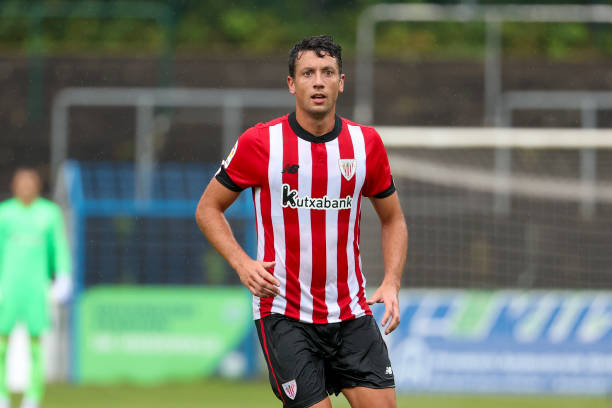

In [2]:
dataset["train"]["image"][1]

In [3]:
dataset["train"]["caption"][1]

'Mikel Vesga Arruti of Athletic Bilbao looks on during the Pre-Season Friendly match between VfL Bochum and Athletic Club on July 21, 2022 in Guetersloh, Germany.'

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['caption', 'image'],
        num_rows: 3960
    })
    test: Dataset({
        features: ['caption', 'image'],
        num_rows: 990
    })
})

In [4]:
from mcq import MCQ

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import random

In [6]:
mcq = MCQ()

In [8]:
def reoorganize_data(data):
    
    mcq_output=mcq.generate_MCQ(data["caption"])
    if mcq_output["question"] !="":
        data["question"]= "[QUESTION]"+ mcq_output["question"]
        options=mcq_output["options"]
        options.append(mcq_output["answer"])
        random.shuffle(options)
        data["choices"]=options
        data["answer"]=mcq_output["answer"]
        data["solution"]=""
        data["choices"] = "[OPTIONS]"+" ".join([f"({chr(ord('A') + i)}) {opcion}" for i, opcion in enumerate(data["choices"])])

        data["CTH"] = True if data["solution"] is None or data["solution"] == "" else False
    else:
        data["question"]=""
        data["choices"]=""
        data["answer"]=""
        data["solution"]=""
        data["CTH"]= False

    return data

In [9]:
text="Vedat Muriqi of RCD Mallorca looks on during the La Liga Santander match between Athletic Club and RCD Mallorca at San Mames Stadium on August 15, 2022 in Bilbao, Spain."
data={"caption":text}
reoorganize_data(data)

{'caption': 'Vedat Muriqi of RCD Mallorca looks on during the La Liga Santander match between Athletic Club and RCD Mallorca at San Mames Stadium on August 15, 2022 in Bilbao, Spain.',
 'question': '[QUESTION]Where was the match between Athletic Club and RCD Mallorca?',
 'choices': '[OPTIONS](A) la liga santander match (B) rcd mallorca (C) san mames stadium',
 'answer': 'san mames stadium',
 'solution': '',
 'CTH': True}

In [10]:
list_dest=[dataset["train"],dataset["test"]]
for idx,_ in enumerate(list_dest):
    list_dest[idx] =list_dest[idx].map(reoorganize_data)

In [11]:
list_dest

[Dataset({
     features: ['caption', 'image', 'question', 'choices', 'answer', 'solution', 'CTH'],
     num_rows: 3960
 }),
 Dataset({
     features: ['caption', 'image', 'question', 'choices', 'answer', 'solution', 'CTH'],
     num_rows: 990
 })]

In [12]:
import datasets
dd = datasets.DatasetDict({"train":list_dest[0],"test":list_dest[1]})

In [13]:
dd.push_to_hub("TheMrguiller/BilbaoQA")

Pushing split train to the Hub.
Creating parquet from Arrow format: 100%|█████████| 2/2 [00:00<00:00,  3.28ba/s]

Map: 100%|█████████████████████████| 1320/1320 [00:00<00:00, 2293.68 examples/s]
                                                                                
Creating parquet from Arrow format: 100%|█████████| 2/2 [00:00<00:00,  3.54ba/s]

Map: 100%|█████████████████████████| 1320/1320 [00:00<00:00, 2152.74 examples/s]
                                                                                
Creating parquet from Arrow format: 100%|█████████| 2/2 [00:00<00:00,  3.12ba/s]

Pushing dataset shards to the dataset hub: 100%|█| 3/3 [07:32<00:00, 150.72s/it]
Pushing split test to the Hub.
Creating parquet from Arrow format: 100%|█████████| 1/1 [00:00<00:00,  2.07ba/s]

Pushing dataset shards to the dataset hub: 100%|█| 1/1 [01:50<00:00, 110.02s/it]


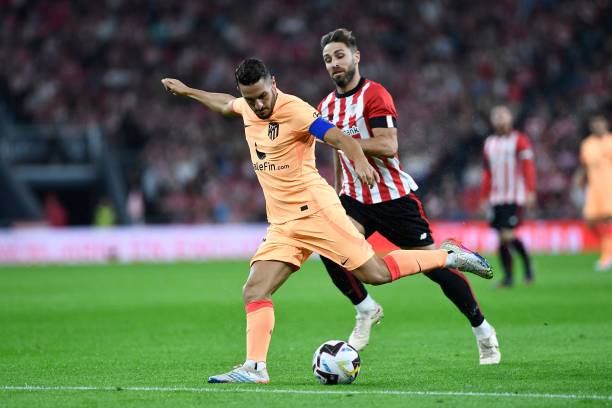

In [15]:
dd["train"]["image"][0]

In [16]:
dd["train"]["caption"][0]

"Atletico Madrid's Spanish midfielder Koke (L) views with Athletic Bilbao's Spanish defender Yeray Alvarez during the Spanish League football match between Athletic Club Bilbao and Club Atletico de Madrid at the San Mames stadium in Bilbao on October 15, 2022."

In [17]:
dd["train"]["question"][0]

'[QUESTION]What did Koke do with Yeray Alvarez during the match?'

In [18]:
dd["train"]["choices"][0]

'[OPTIONS](A) Interviews (B) views (C) Subscriber'

In [19]:
dd["train"]["answer"][0]

'views'